# Data Information:
### (Several difinations are different from the website)

Input variables:
## bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'tertiary', 'secondary', 'unknown', 'primary')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')
## related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day: last contact day (numeric)

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
## other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Note that the explaination of one input variable, 'balance', is missing on the website. I assume that 'balance' means the net worth of asset and liability.

16 - balance:the net worth of clint's asset and liability
## Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Data preprocessing 

Import libraries and data, select a small sample set for trainning

And, according to the Data Information, we delete the NO.11 variable (duration)

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

bank_origin = pd.read_csv('./DataSet1/bank.csv',sep=';')
bank = bank_origin.sample(n = 400)

bank = bank.drop(['duration'],axis = 1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
1413,42,blue-collar,married,primary,no,1520,yes,no,cellular,5,feb,1,-1,0,unknown,no
3633,36,technician,married,tertiary,no,629,yes,yes,cellular,29,dec,1,246,1,failure,no
340,41,management,married,tertiary,no,832,yes,yes,cellular,21,nov,1,176,1,failure,no
3971,52,blue-collar,divorced,primary,no,1758,yes,no,unknown,15,may,1,-1,0,unknown,no
491,33,services,divorced,secondary,no,991,yes,no,unknown,27,may,1,-1,0,unknown,no


### Processing the ordinal and nominal data,seperately

In my opinion, only 'education' variable is ordinal

So every sample with 'unknown' in column 'education' will be dropped

We treat other 'unknown's as a particular category for better prediction

In [2]:
bank = bank.replace({'education':'unknown'},np.nan)
bank = bank.dropna()
edu_mapping = {
    'primary':1,
    'secondary':2,
    'tertiary':3
}
bank['education']=bank['education'].map(edu_mapping)

from sklearn.preprocessing import LabelEncoder
bank_le = LabelEncoder()
bank['job'] = bank_le.fit_transform(bank['job'].values)
bank['marital'] = bank_le.fit_transform(bank['marital'].values)
bank['default'] = bank_le.fit_transform(bank['default'].values)
bank['housing'] = bank_le.fit_transform(bank['housing'].values)
bank['loan'] = bank_le.fit_transform(bank['loan'].values)
bank['contact'] = bank_le.fit_transform(bank['contact'].values)
bank['month'] = bank_le.fit_transform(bank['month'].values)
bank['poutcome'] = bank_le.fit_transform(bank['poutcome'].values)
bank['y'] = bank_le.fit_transform(bank['y'].values)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
1413,42,1,1,1,0,1520,1,0,0,5,3,1,-1,0,3,0
3633,36,9,1,3,0,629,1,1,0,29,2,1,246,1,0,0
340,41,4,1,3,0,832,1,1,0,21,9,1,176,1,0,0
3971,52,1,0,1,0,1758,1,0,2,15,8,1,-1,0,3,0
491,33,7,0,2,0,991,1,0,2,27,8,1,-1,0,3,0


In [3]:
X, y = bank.iloc[:,:-1] , bank.iloc[:,-1]

### Splitting data into 70% training and 30% test data:

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

### Bringing features onto the same scale

Here we choose standardization instead of normalization

Standardizing both the numeric and the Categorical features

In [5]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
#X_train[['age','balance','day','campaign','pdays','previous']] = stdsc.fit_transform(X_train[['age','balance','day','campaign','pdays','previous']])
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)

pca.explained_variance_ratio_

array([ 0.18306561,  0.11563574,  0.10084738,  0.08868432,  0.07649645,
        0.07034515,  0.06740699,  0.05874131,  0.05316627,  0.05134762,
        0.0397019 ,  0.03374093,  0.03104759,  0.02208161,  0.00769114])

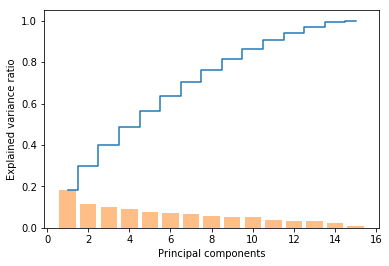

In [33]:
import matplotlib.pyplot as plt

plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

# Training Data with Different Models

### Since we have features more than 3, we could not show any visualized outcomes. 

### So the visualization of the result will be shown in the end of this page.

## Perceptron

Here we use L1 regularization to zero out irrelevant features

And we found that the accuracy of testing is highly sensitive to n_iter, it will change from 89% to 25% by a small change in n_iter. 

In [10]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(penalty='l1',n_iter=0.1, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

print('accuracy of trainning = ' ,ppn.score(X_train,y_train))
print('accuracy of testing = ' ,ppn.score(X_test,y_test))

accuracy of trainning =  0.900735294118
accuracy of testing =  0.897435897436


## Logistic Regression

Similar to Perceptron, we use L1 regularization for optimal features selection

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1',C=0.3,random_state=1)   
lr.fit(X_train, y_train)
print('accuracy of trainning = ' ,lr.score(X_train,y_train))
print('accuracy of testing = ' ,lr.score(X_test,y_test))
print(lr.coef_[0])

accuracy of trainning =  0.900735294118
accuracy of testing =  0.897435897436
[ 0.          0.          0.19096612  0.         -0.06409182  0.          0.
 -0.00808238 -0.27897254  0.09775272  0.          0.          0.103406
  0.2693873   0.        ]


From above we can see the coeffients of the model and only 7 features were used in the model

We can check the importance of different features under different 'C' from the picture below

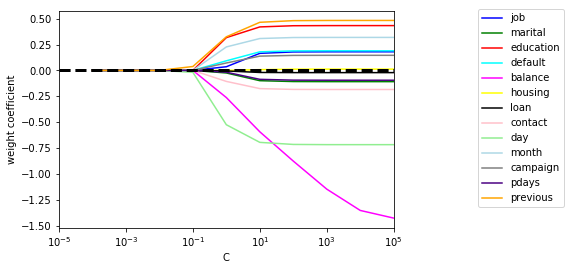

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train, y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=X.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

## Sequential Backward Selection

Here we want to use SBS method to select meaningful features

However, the accuracy of several models almost remains the same as the number of features changes

In [49]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

# Support Vector Machines

We can observe that the accuracy remain unchanged despite of the increase of features

So we just use all the features since it doesn't require much of computation

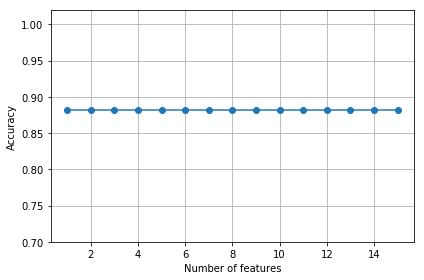

accuracy of trainning =  0.900735294118
accuracy of testing =  0.897435897436


In [52]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=1)

# selecting features
sbs = SBS(svm, k_features=1)
sbs.fit(X_train, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()


svm.fit(X_train, y_train)

print('accuracy of trainning = ' ,svm.score(X_train,y_train))
print('accuracy of testing = ' ,svm.score(X_test,y_test))


# Kernel SVM

Similarly, we use all the features since the quality of the model stay high

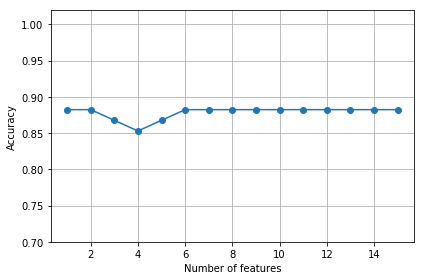

accuracy of trainning =  1.0
accuracy of testing =  0.897435897436


In [53]:
svm = SVC(kernel='rbf', random_state=1, gamma=20, C=100)

# selecting features
sbs = SBS(svm, k_features=1)
sbs.fit(X_train, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

svm.fit(X_train, y_train)

print('accuracy of trainning = ' ,svm.score(X_train,y_train))
print('accuracy of testing = ' ,svm.score(X_test,y_test))


## Decision Tree

We choose the optimal 12 features to construct the model

However, the accuracy of test almost doesn't imporve

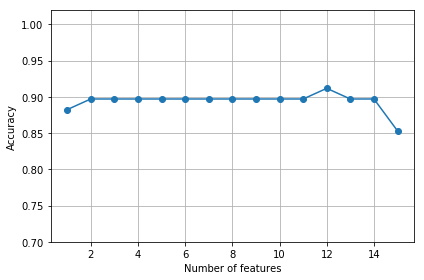

accuracy of trainning =  0.933823529412
accuracy of testing =  0.897435897436


In [70]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3, 
                              random_state=1)

# selecting features
sbs = SBS(tree, k_features=1)
sbs.fit(X_train, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()


tree.fit(X_train, y_train)

print('accuracy of trainning = ' ,tree.score(X_train,y_train))
print('accuracy of testing = ' ,tree.score(X_test,y_test))

Training with only 12 features

In [74]:
k12 = list(sbs.subsets_[3])
print(X.columns[1:][k12])

tree.fit(X_train[:, k12], y_train)

print('accuracy of trainning = ' ,tree.score(X_train[:, k12],y_train))
print('accuracy of testing = ' ,tree.score(X_test[:, k12],y_test))

Index(['job', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'campaign', 'previous'],
      dtype='object')
accuracy of trainning =  0.908088235294
accuracy of testing =  0.897435897436


<br>
<br>

## Random Forests

We choose the optimal 10 features to construct the model

Again, the accuracy of test almost doesn't imporve

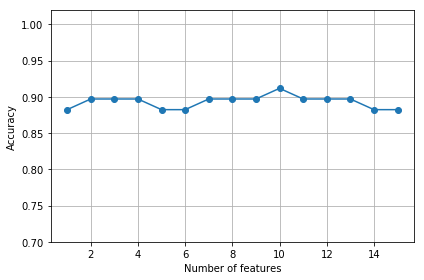

accuracy of trainning =  0.992647058824
accuracy of testing =  0.897435897436


In [71]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=30, 
                                random_state=1,
                                n_jobs=2)
# selecting features
sbs = SBS(forest, k_features=1)
sbs.fit(X_train, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

forest.fit(X_train, y_train)

print('accuracy of trainning = ' ,forest.score(X_train,y_train))
print('accuracy of testing = ' ,forest.score(X_test,y_test))

Training with only 10 features

In [76]:
k10 = list(sbs.subsets_[5])
print(X.columns[1:][k10])

forest.fit(X_train[:, k10], y_train)

print('accuracy of trainning = ' ,forest.score(X_train[:, k10],y_train))
print('accuracy of testing = ' ,forest.score(X_test[:, k10],y_test))

Index(['job', 'marital', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'month', 'previous'],
      dtype='object')
accuracy of trainning =  0.996323529412
accuracy of testing =  0.897435897436


# K-nearest Neighbors

We use all the features since the accuracy is a horizontal line

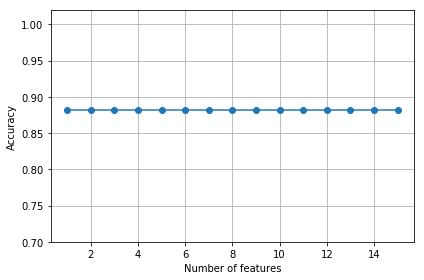

accuracy of trainning =  0.900735294118
accuracy of testing =  0.897435897436


In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30, 
                           p=2, 
                           metric='minkowski')
# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

knn.fit(X_train, y_train)

print('accuracy of trainning = ' ,knn.score(X_train,y_train))
print('accuracy of testing = ' ,knn.score(X_test,y_test))

## Import plot functions

This is used for visualization of the results

In [42]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

## Assessing feature importance with random forests

Since all the models we used above involve features more than 3, here we bulid a new Logistic Regression model with 2 features only to show a visualized results

Two most importance features were chosen using random forests

 1) housing                        0.150004
 2) job                            0.149429
 3) month                          0.124630
 4) campaign                       0.086679
 5) previous                       0.085724
 6) marital                        0.071684
 7) poutcome                       0.065344
 8) pdays                          0.064257
 9) y                              0.060245
10) default                        0.040896
11) education                      0.032943
12) loan                           0.026832
13) day                            0.025725
14) contact                        0.014295
15) balance                        0.001315


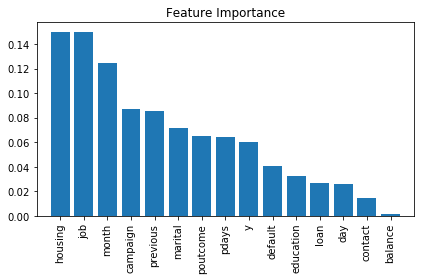

In [68]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = bank.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Use 'housing' and 'job' features to construct the model

accuracy of trainning =  0.900735294118
accuracy of testing =  0.897435897436


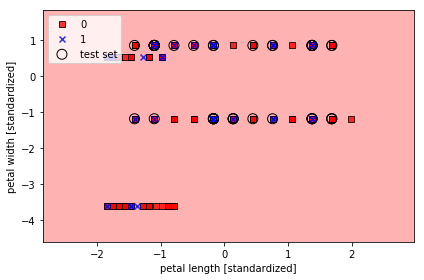

In [69]:
X_train_plot = X_train[:,[1,6]]
X_test_plot = X_test[:,[1,6]]

lr2 = LogisticRegression(penalty='l1',C=5,random_state=1)   
lr2.fit(X_train_plot, y_train)

X_combined = np.vstack((X_train_plot,X_test_plot))
y_combined = np.hstack((y_train, y_test))

print('accuracy of trainning = ' ,lr2.score(X_train_plot,y_train))
print('accuracy of testing = ' ,lr2.score(X_test_plot,y_test))

plot_decision_regions(X_combined, y_combined,
                      classifier=lr2, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The result shows that the model predict all target value as '0'(means 'no')

However, even in that case we still get a accuracy as higher as 90%, which indicates that the data 

themselves maybe problematic 

<br>
<br>